In [18]:
from google.colab import drive
drive.mount('/content/drive') 
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, merge, UpSampling2D,BatchNormalization

In [4]:
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model

In [5]:
def lr_scheduler(epoch, lr):
    if epoch > 5:
        lr = 0.00001
        return lr
    return lr

callbacks = [keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)]

In [ ]:
def mobilnet_block (x, filters, strides):
    
    x = DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters = filters, kernel_size = 1, strides = 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    return x

def mobilenet():
  #stem of the model
  K.set_image_data_format('channels_last')
  input = Input(shape = (224,224,3))
  x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  # main part of the model
  x = mobilnet_block(x, filters = 64, strides = 1)
  x = mobilnet_block(x, filters = 128, strides = 2)
  x = mobilnet_block(x, filters = 128, strides = 1)
  x = mobilnet_block(x, filters = 256, strides = 2)
  x = mobilnet_block(x, filters = 256, strides = 1)
  x = mobilnet_block(x, filters = 512, strides = 2)
  for _ in range (5):
       x = mobilnet_block(x, filters = 512, strides = 1)
  x = mobilnet_block(x, filters = 1024, strides = 2)
  x = mobilnet_block(x, filters = 1024, strides = 1)
  x = AvgPool2D (pool_size = 7, strides = 1, data_format='channels_last')(x)
  flatten = Flatten()(x)
  output = Dense (units = 3, activation = 'softmax')(flatten)
  model = Model(inputs=input, outputs=output)
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy','Recall',MeanIoU(num_classes=3),'Precision'])
  return model

In [12]:
def AlexNet():
  model = Sequential()

# 1st Convolutional Layer
  model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
  model.add(Activation('relu'))
# Max Pooling 
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
# Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))

# 4th Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))

# 5th Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
# Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
  model.add(Flatten())
# 1st Fully Connected Layer
  model.add(Dense(4096, input_shape=(224*224*3,)))
  model.add(Activation('relu'))
# Add Dropout to prevent overfitting
  model.add(Dropout(0.4))

# 2nd Fully Connected Layer
  model.add(Dense(4096))
  model.add(Activation('relu'))
# Add Dropout
  model.add(Dropout(0.4))

# 3rd Fully Connected Layer
  model.add(Dense(1000))
  model.add(Activation('relu'))
# Add Dropout
  model.add(Dropout(0.4))

# Output Layer
  model.add(Dense(3))
  model.add(Activation('softmax'))

# Compile the model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.0001), metrics=['accuracy','Recall',MeanIoU(num_classes=3),'Precision'])
  return model

In [ ]:
def VGG16():
  model = Sequential([
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', dilation_rate=2,padding='same', input_shape=(512,512,3)),
     #   MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', dilation_rate=2,padding='same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=128, kernel_size=(3,3), activation='relu', dilation_rate=1, padding='same'),
    #    MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=128, kernel_size=(3,3), activation='relu', dilation_rate=1, padding='same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    #    MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    #    MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        BatchNormalization(axis=1),
        Conv2D(filters=1024, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2), strides=2),

        BatchNormalization(axis=1),
        Dense(units=4096),
        BatchNormalization(axis=1),
        Dense(units=4096),
        BatchNormalization(axis=1),
        Flatten(),
        Dense(units=3, activation='softmax')
    ])
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy','Recall',MeanIoU(num_classes=3),'Precision'])
  return model

In [ ]:
def MoonRockNet():
    K.set_image_data_format('channels_last')
    inputs = Input((512 , 512, 3))
    
    conv1 = Conv2D(64, (3, 3), activation='relu',dilation_rate=2, padding='same') (inputs)
    batch1 = BatchNormalization(axis=3)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu',dilation_rate=2, padding='same') (batch1)
    batch1 = BatchNormalization(axis=3)(conv1)
    pool1 = MaxPooling2D((2, 2))(batch1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu',dilation_rate=1, padding='same') (pool1)
    batch2 = BatchNormalization(axis=3)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu',dilation_rate=1,padding='same') (batch2)
    batch2 = BatchNormalization(axis=3)(conv2)
    pool2 = MaxPooling2D((2, 2))(batch2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=3)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=3)(conv3)
    conv33 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch33 = BatchNormalization(axis=3)(conv33)
    pool3 = MaxPooling2D((2, 2))(batch33)
    
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch4 = BatchNormalization(axis=3)(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    batch4 = BatchNormalization(axis=3)(conv4)
    conv43 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    batch43 = BatchNormalization(axis=3)(conv43)
    pool4 = MaxPooling2D(pool_size=(2, 2))(batch4)

    
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (pool4)
    up6 = concatenate([up6, conv4], axis=3)
    
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (up6)
    up7 = concatenate([up7, conv3], axis=3)
    
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (up7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=3)(conv8)
    pool5 = MaxPooling2D(pool_size=(2, 2))(batch8)
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same') (pool5)
    batch9 = BatchNormalization(axis=3)(conv8)
    pool6 = MaxPooling2D(pool_size=(2, 2))(batch9)
   
    flatten1 =  Flatten()(pool6)
    dense2 = Dense(units=256, activation='relu')(flatten1)
    dense3 = Dense(units=3, activation='softmax')(dense2)
    

    model = Model(inputs=[inputs], outputs=[dense3])

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy','Recall',MeanIoU(num_classes=3),'Precision'])

    return model

In [9]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)

In [10]:
def plotImages(images_arr):
    figs, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def ROC(predictions, test_batches):
  from sklearn.preprocessing import OneHotEncoder
  ohe = OneHotEncoder()
  transformed = ohe.fit_transform(test_batches.classes.reshape(-1,1))
  y_true = transformed.toarray()



  from sklearn.metrics import auc
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(3):
      fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), predictions.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
  from itertools import cycle
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
  lw = 2
# Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(3):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
  mean_tpr /= 3

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
  plt.figure()
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )

  plt.plot(
      fpr["macro"],
      tpr["macro"],
      label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
      color="navy",
      linestyle=":",
      linewidth=4,
  )

  colors = cycle(["aqua", "darkorange", "cornflowerblue", "b" , "g", "r", "c"])
  for i, color in zip(range(3), colors):
      plt.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic to 3 types of rock")
  plt.legend(loc="lower right")
  plt.show()

Found 496 images belonging to 3 classes.
Found 116 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

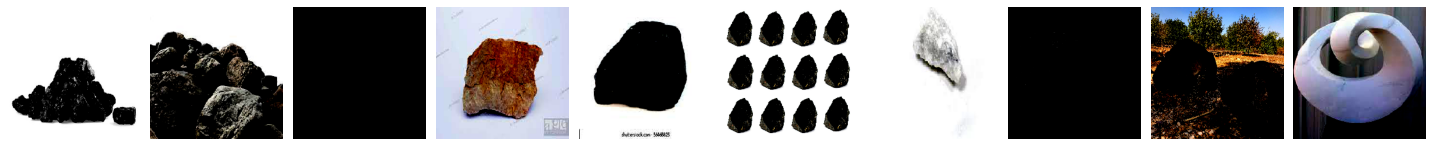

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 activation_36 (Activation)  (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 activation_37 (Activation)  (None, 17, 17, 256)       0         
                                                                 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

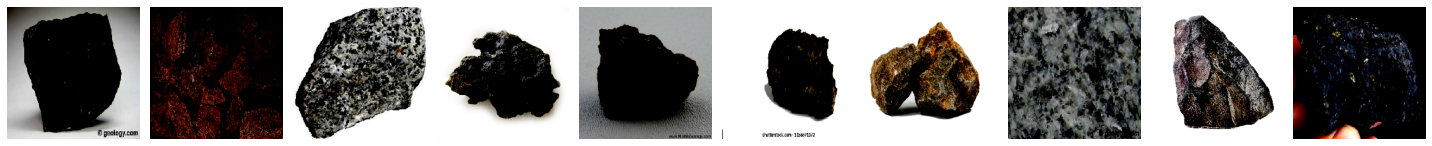

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
              precision    recall  f1-score   support

           0       0.40      0.75      0.52        28
           1       0.54      0.79      0.64        43
           2       0.00      0.00      0.00        45

    accuracy                           0.47       116
   macro avg       0.31      0.51      0.39       116
weighted avg       0.30      0.47      0.36       116

Confusion matrix, without normalization
[[21  7  0]
 [ 9 34  0]
 [23 22  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


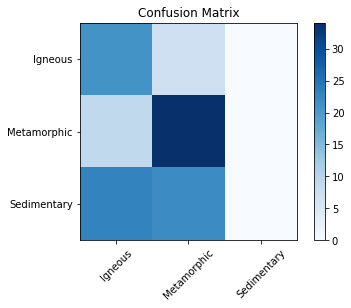

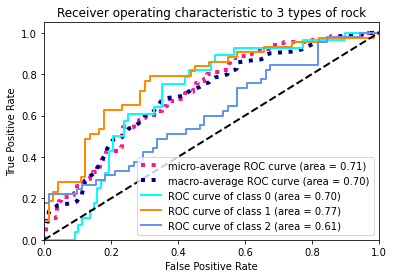

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy,Precision,MeanIoU,Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,classification_report
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

#Organize data dirs
os.chdir(r"/content/drive/My Drive/app/RockUnet/")
os.chdir('dataset')

train_path = 'train'
test_path = 'test'

#train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(512,512), classes=['Igneous','Metamorphic','Sedimentary'],batch_size=10, shuffle=True)
#test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(512,512), classes=['Igneous','Metamorphic','Sedimentary'],batch_size=10, shuffle=False)

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), classes=['Igneous','Metamorphic','Sedimentary'],batch_size=10, shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), classes=['Igneous','Metamorphic','Sedimentary'],batch_size=10, shuffle=False)

assert train_batches.n == 496
assert test_batches.n == 116
assert train_batches.num_classes == test_batches.num_classes == 3

imgs, labels = next(train_batches)

plotImages(imgs)
print(labels)


model = AlexNet()
#model = VGG16()
#model = mobilenet()
#model = MoonRockNet()
model.summary()


model.fit(x=train_batches, epochs=10, callbacks=callbacks, verbose=2)

test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

predictions = model.predict(x=test_batches, verbose=0)

np.round(predictions)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

print(classification_report(test_batches.classes, np.argmax(predictions, axis=-1)))

    
cm_plot_labels = ['Igneous','Metamorphic','Sedimentary']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

ROC(predictions, test_batches)


In [ ]:
moon_image_path = 'moon'
moon_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=moon_image_path, target_size=(512,512), classes=['Igneous','Metamorphic','Sedimentary'],batch_size=10, shuffle=False)
moon_test = model.predict(x=moon_batches, verbose=2)
print(moon_batches.classes)
print(np.argmax(moon_test, axis=-1))

Found 1 images belonging to 3 classes.
1/1 - 1s - 912ms/epoch - 912ms/step
[0]
[0]


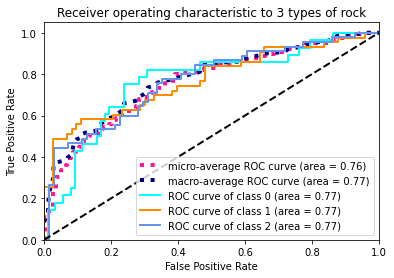